In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
observations= pd.read_csv('observations.csv')
species= pd.read_csv('species_info.csv')

In [8]:
observations.head()
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [18]:
species.head()
conserv_s= species.conservation_status.value_counts()
conserv_s

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [ ]:
We have a extreme minority of 'In Recovery' species. What is different about them? What if anything did we do to reverse the
extinction process. Let's see if any of them are in our observations.

In [22]:
inrecovery_count= species[species.conservation_status == 'In Recovery']

In [23]:
inrecovery_count

,category,scientific_name,common_names,conservation_status
100,Bird,Haliaeetus leucocephalus,Bald Eagle,In Recovery
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3143,Bird,Falco peregrinus anatum,American Peregrine Falcon,In Recovery
4565,Bird,Pelecanus occidentalis,Brown Pelican,In Recovery


In [24]:
inrecovery_obs= pd.merge(inrecovery_count, observations, how= 'inner')

In [28]:
inrecovery_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             24 non-null     object
 1   scientific_name      24 non-null     object
 2   common_names         24 non-null     object
 3   conservation_status  24 non-null     object
 4   park_name            24 non-null     object
 5   observations         24 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 1.3+ KB


In [ ]:
Now let's look at a count of the 'Endangered' observations.

In [27]:
endangered_count= species[species.conservation_status == 'Endangered']
endangered_obs= pd.merge(endangered_count, observations, how= 'inner')
endangered_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             80 non-null     object
 1   scientific_name      80 non-null     object
 2   common_names         80 non-null     object
 3   conservation_status  80 non-null     object
 4   park_name            80 non-null     object
 5   observations         80 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 3.9+ KB


In [ ]:
Now let's chart the total observations of Endangered vs In recovery across all 7 days.

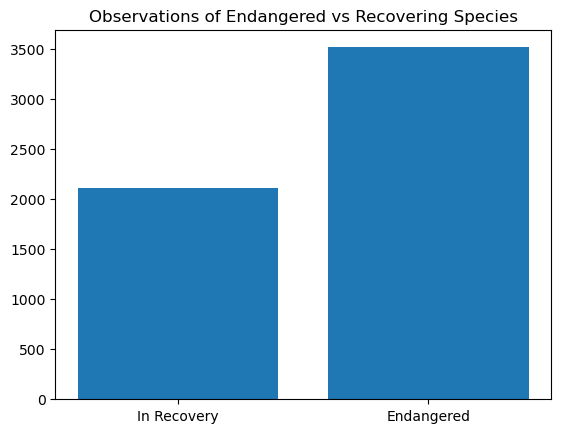

In [58]:
inrecovery_counts= inrecovery_obs.observations.sum()
endangered_counts= endangered_obs.observations.sum()
counts1= [inrecovery_counts, endangered_counts]
ax= plt.subplot()
plt.bar(range(len(counts1)), counts1 )
plt.title('Observations of Endangered vs Recovering Species')
ax.set_xticks(range(len(counts1)))
ax.set_xticklabels(['In Recovery', 'Endangered'])
plt.show()

In [39]:
Now let's look at the counts for all the conservation statuses.

dtype('int64')